<a href="https://colab.research.google.com/github/shaikafroz016/cats_vs_dogs/blob/master/cats_vs_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shaikafroz0016","key":"3a66956d0aec0dfa53b093e4ac5e0f72"}'}

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
!kaggle datasets download -d thesherpafromalabama/cats-and-dogs-sentdex-tutorial


100% 1.54G/1.54G [00:25<00:00, 53.7MB/s]
100% 1.54G/1.54G [00:25<00:00, 64.0MB/s]


In [0]:

!mkdir PetImages
!unzip /content/cats-and-dogs-sentdex-tutorial.zip -d /content/PetImages

Archive:  /content/cats-and-dogs-sentdex-tutorial.zip
  inflating: /content/PetImages/MSR-LA - 3467.docx  
  inflating: /content/PetImages/PetImages/Cat/0.jpg  
  inflating: /content/PetImages/PetImages/Cat/1.jpg  
  inflating: /content/PetImages/PetImages/Cat/10.jpg  
  inflating: /content/PetImages/PetImages/Cat/100.jpg  
  inflating: /content/PetImages/PetImages/Cat/1000.jpg  
  inflating: /content/PetImages/PetImages/Cat/10000.jpg  
  inflating: /content/PetImages/PetImages/Cat/10001.jpg  
  inflating: /content/PetImages/PetImages/Cat/10002.jpg  
  inflating: /content/PetImages/PetImages/Cat/10003.jpg  
  inflating: /content/PetImages/PetImages/Cat/10004.jpg  
  inflating: /content/PetImages/PetImages/Cat/10005.jpg  
  inflating: /content/PetImages/PetImages/Cat/10006.jpg  
  inflating: /content/PetImages/PetImages/Cat/10007.jpg  
  inflating: /content/PetImages/PetImages/Cat/10008.jpg  
  inflating: /content/PetImages/PetImages/Cat/10009.jpg  
  inflating: /content/PetImages/PetIm

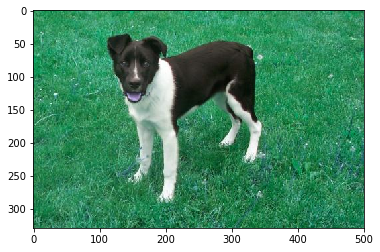

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

data_dir = '/content/PetImages/PetImages' #Path for directory with training data.
categories = ['Dog', 'Cat']
for category in categories:
    path = os.path.join(data_dir, category) #Path for either Cat images or Dog Images
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img)) #Converting image to array
        plt.imshow(img_array)
        plt.show()
        break
    break

In [0]:
print('Dimensions : ' + str(img_array.shape) + '\n\n\n' ) #Shape or Dimensions of an image
print(img_array) #Representation of image as array

Dimensions : (329, 500, 3)



[[[ 48 153  86]
  [ 49 154  87]
  [ 43 147  82]
  ...
  [ 23 113  67]
  [ 36 126  80]
  [ 55 145  99]]

 [[ 40 144  79]
  [ 46 150  85]
  [ 43 147  82]
  ...
  [ 28 118  72]
  [ 39 129  83]
  [ 56 146 100]]

 [[ 49 150  88]
  [ 50 151  89]
  [ 43 144  82]
  ...
  [ 26 116  70]
  [ 35 125  79]
  [ 49 139  93]]

 ...

 [[ 53 122  79]
  [ 77 148 105]
  [ 50 122  80]
  ...
  [ 43 131  91]
  [ 41 129  89]
  [ 47 133  93]]

 [[ 43 112  69]
  [ 82 153 110]
  [ 31 101  60]
  ...
  [ 35 123  83]
  [ 46 134  94]
  [ 59 147 107]]

 [[ 73 142  99]
  [ 82 153 110]
  [ 49 119  78]
  ...
  [ 64 156 115]
  [ 64 153 113]
  [ 62 151 111]]]


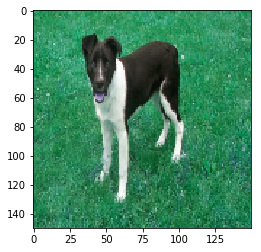

In [0]:
img_size = 150
new_img_arr = cv2.resize(img_array, (img_size, img_size)) #Resizing image to get a constant shape throughout the dataset.
plt.imshow(new_img_arr)

In [0]:

training_data = []

def create_training_data():
    for category in categories:
        path = os.path.join(data_dir, category) #Path for either Cat images or Dog Images
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img)) #Converting image to array
                new_img_arr = cv2.resize(img_array, (img_size, img_size)) #Resizing all the images
                training_data.append([new_img_arr, class_num])
            except Exception as e:
                pass

create_training_data()

In [0]:
print(len(training_data)) #Totoal images to train


24946


In [0]:

import random

random.shuffle(training_data) #Shuffling the images

In [0]:
images = []
labels = []

In [0]:

for features,label in training_data:
    images.append(features) #Separating images and labels into two different lists
    labels.append(label)
images = np.array(images).reshape(-1, img_size, img_size, 3)

In [0]:
import pickle

#Saving the processed images and labels list into files
pickle_out = open('cats_dogs_features', 'wb')
pickle.dump(images,pickle_out)
pickle_out.close()
pickle_out = open('cats_dogs_labels', 'wb')
pickle.dump(labels,pickle_out)
pickle_out.close()

#These can be loaded if needed!
#images = pickle.load(open("/content/giiit/cats_dogs_features", 'rb'))
#labels = pickle.load(open("/content/giiit/cats_dogs_labels", 'rb'))

In [0]:
#Building our model
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

#Training our model
history = model.fit(images,labels,batch_size=32, epochs = 10, validation_split = 0.1)

Train on 22451 samples, validate on 2495 samples
Epoch 1/10
22451/22451 [==============================] - 51s 2ms/sample - loss: 1.1554 - acc: 0.5869 - val_loss: 0.6304 - val_acc: 0.6453
Epoch 2/10
22451/22451 [==============================] - 51s 2ms/sample - loss: 0.5943 - acc: 0.6834 - val_loss: 0.5334 - val_acc: 0.7419
Epoch 3/10
22451/22451 [==============================] - 51s 2ms/sample - loss: 0.5157 - acc: 0.7488 - val_loss: 0.4431 - val_acc: 0.8000
Epoch 4/10
22451/22451 [==============================] - 51s 2ms/sample - loss: 0.4452 - acc: 0.7970 - val_loss: 0.4693 - val_acc: 0.7772
Epoch 5/10
22451/22451 [==============================] - 51s 2ms/sample - loss: 0.3906 - acc: 0.8256 - val_loss: 0.3599 - val_acc: 0.8377
Epoch 6/10
22451/22451 [==============================] - 51s 2ms/sample - loss: 0.3377 - acc: 0.8542 - val_loss: 0.3201 - val_acc: 0.8649
Epoch 7/10
22451/22451 [==============================] - 51s 2ms/sample - loss: 0.3116 - acc: 0.8677 - val_loss: 0.3

In [0]:

#Saving the trained model!
model.save('Cats_Dogs.h5')

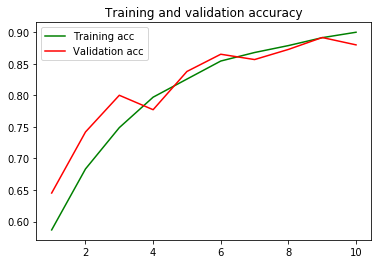

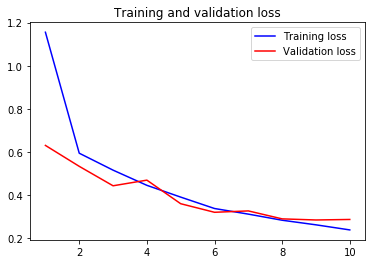

In [0]:
#plotting accuracy, loss , validation accuracy and validation loss
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history ['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

[[0.28037298]]
 Given Image is a Dog 


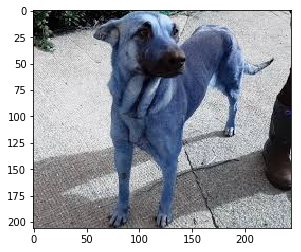

In [0]:
import cv2
import tensorflow as tf

categories = ['Dog', 'Cat']


def prepare(filepath):
    img_size = 150 # 50 in txt-based
    img_array = cv2.imread(filepath,)
    img_new_array = cv2.resize(img_array, (img_size, img_size))
    return img_new_array.reshape(-1, img_size, img_size, 3)


model = tf.keras.models.load_model('Cats_Dogs.h5')

test_img = '/content/dog1.jpg'
prediction = model.predict([prepare(test_img)])
print(prediction)  # will be a list in a list.
#print(categories[int(prediction[0][0])])
if prediction <= 0.5:
  print(" Given Image is a Dog ")
elif prediction > 0.5:
  print(" Given Image is a Cat ")



test_img_array = cv2.imread(test_img)
plt.imshow(test_img_array)
plt.show()